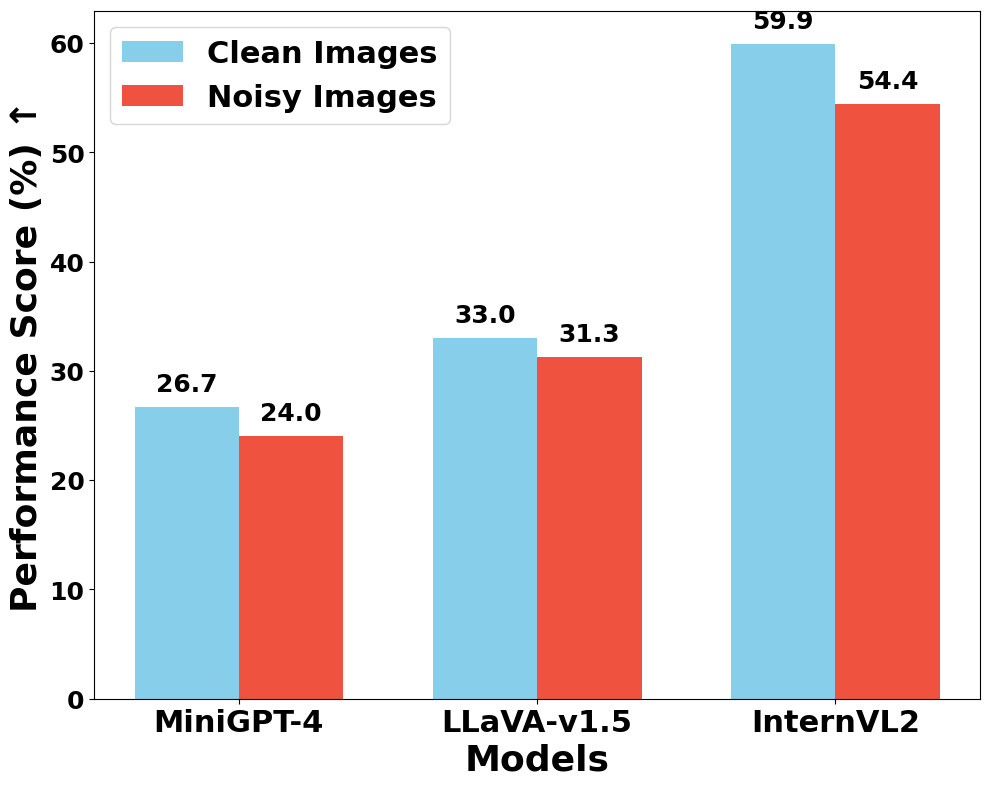

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 配置全局字体为加粗
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# 数据
models = ['MiniGPT-4', 'LLaVA-v1.5', 'InternVL2']
clean_scores = [26.7, 33.0, 59.9]
noisy_scores = [24.0, 31.3, 54.4]

# 配置字体大小
title_fontsize = 22
label_fontsize = 26
tick_fontsize = 18
legend_fontsize = 22
value_fontsize = 18

# 绘图
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 8))

# 绘制柱状图
bar1 = ax.bar(x - width / 2, clean_scores, width, label='Clean Images', color='skyblue')
bar2 = ax.bar(x + width / 2, noisy_scores, width, label='Noisy Images', color='#EF5340')

# 设置标签和标题
ax.set_xlabel('Models', fontsize=label_fontsize)
ax.set_ylabel('Performance Score (%) ↑', fontsize=label_fontsize)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=22)
ax.legend(fontsize=legend_fontsize)

# 设置 y 轴刻度字体大小
ax.tick_params(axis='y', labelsize=tick_fontsize)

# 在柱状图上显示数值
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 1.0, f'{yval:.1f}', ha='center', va='bottom', fontsize=value_fontsize)

# 调整布局和保存图像
plt.tight_layout()
plt.savefig('Gaussian_Performance_Impact.pdf', format='pdf', bbox_inches='tight')
plt.show()

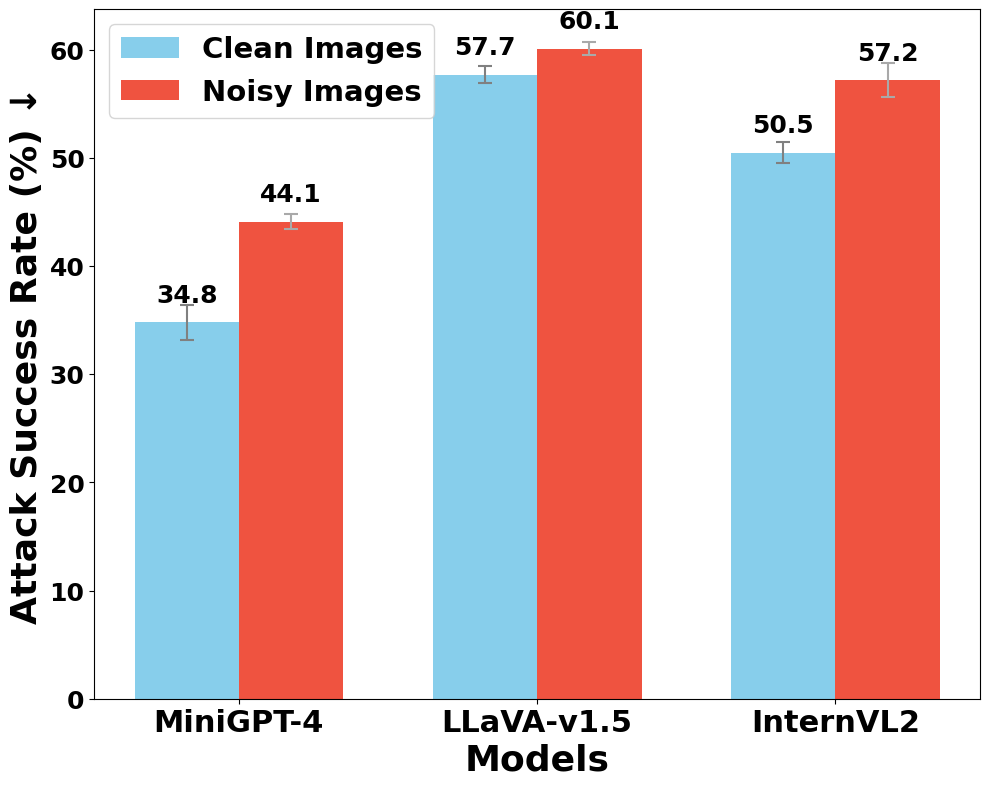

In [13]:
# 导入必要的库
import matplotlib.pyplot as plt
import numpy as np

# 数据定义：模型名称、干净和带噪声的成功率以及对应的误差
models_rtp = ['MiniGPT-4', 'LLaVA-v1.5', 'InternVL2']
clean_scores_rtp = [34.8, 57.7, 50.5]
clean_errors = [1.6, 0.8, 1.0]
noisy_scores_rtp = [44.1, 60.1, 57.2]
noisy_errors = [0.7, 0.6, 1.6]

# 设置图表参数
x_rtp = np.arange(len(models_rtp))  # 模型在 x 轴的位置
width_rtp = 0.35  # 柱状图宽度

# 创建图表和子图
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制带有误差棒的柱状图，选择适当的颜色和误差棒样式
bar1_rtp = ax.bar(x_rtp - width_rtp/2, clean_scores_rtp, width_rtp, label='Clean Images', color='skyblue',
                  yerr=clean_errors, error_kw=dict(ecolor='gray', lw=1.5, capsize=5, capthick=1.5))
bar2_rtp = ax.bar(x_rtp + width_rtp/2, noisy_scores_rtp, width_rtp, label='Noisy Images', color='#EF5340',
                  yerr=noisy_errors, error_kw=dict(ecolor='darkgray', lw=1.5, capsize=5, capthick=1.5))

# 添加标签和标题，设置字体大小
ax.set_xlabel('Models', fontsize=26)
ax.set_ylabel('Attack Success Rate (%) ↓', fontsize=26)
# ax.set_title('Attack Success Rate on RealToxicityPrompts', fontsize=22)
ax.set_xticks(x_rtp)
ax.set_xticklabels(models_rtp, fontsize=22)
ax.legend(fontsize=21)

# 设置 y 轴刻度字体大小
ax.tick_params(axis='y', labelsize=18)

# 将柱状图的数值标签显示在误差棒上方以避免重叠
for bars in [bar1_rtp, bar2_rtp]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + max(clean_errors + noisy_errors) - 0.2,
                f'{yval:.1f}', ha='center', va='bottom', fontsize=18)

# 调整布局并显示图表
plt.tight_layout()
plt.savefig('Gaussian_ASR_Impact.pdf', format='pdf', bbox_inches='tight')
plt.show()

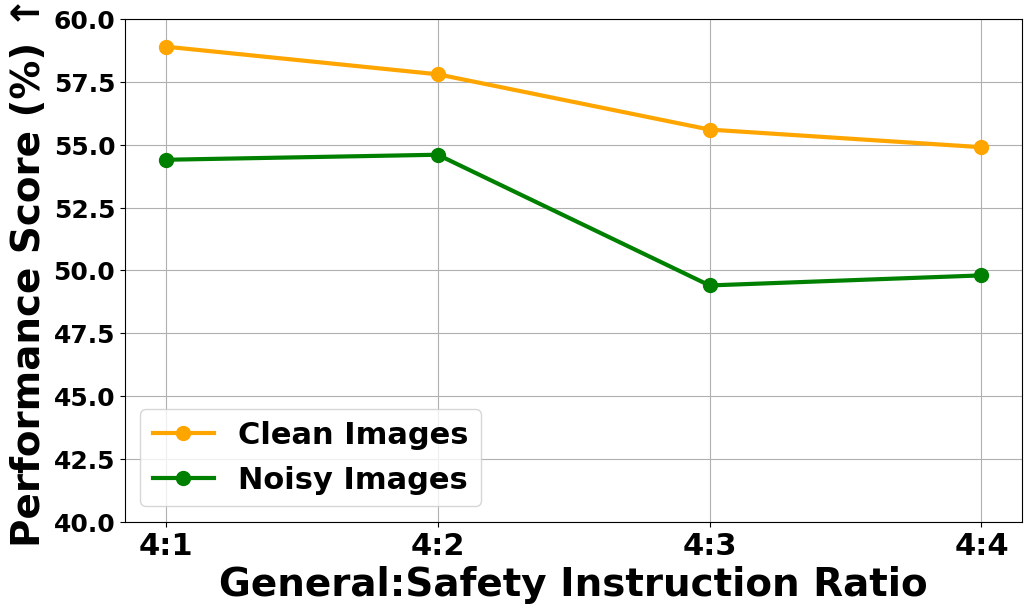

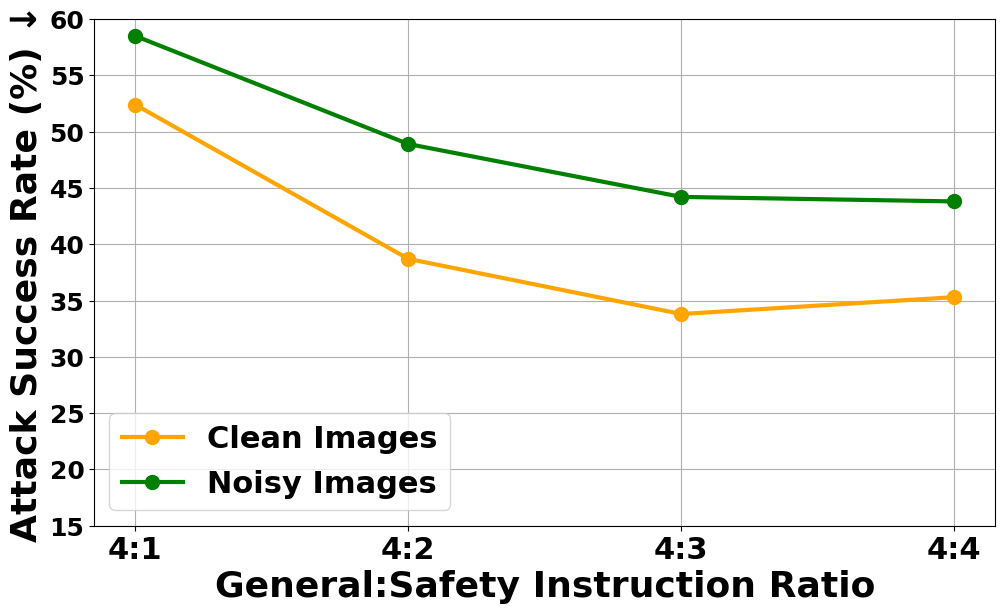

In [34]:
import matplotlib.pyplot as plt

# Data for different ratios of general instructions to safety instructions
ratios = ["4:1", "4:2", "4:3", "4:4"]
mm_vet_clean = [58.9, 57.8, 55.6, 54.9]
mm_vet_noisy = [54.4, 54.6, 49.4, 49.8]
toxicity_clean = [52.4, 38.7, 33.8, 35.3]
toxicity_noisy = [58.5, 48.9, 44.2, 43.8]

# Plot MM-VET results (Higher is Better)
plt.figure(figsize=(10, 6))
plt.plot(ratios, mm_vet_clean, label="Clean Images", marker="o", linestyle="-", color="orange", linewidth=3, markersize=10)
plt.plot(ratios, mm_vet_noisy, label="Noisy Images", marker="o", linestyle="-", color="green", linewidth=3, markersize=10)
plt.xlabel("General:Safety Instruction Ratio", fontsize=28)
plt.ylabel("Performance Score (%) ↑", fontsize=28)
# plt.title("MM-Vet Performance by Instruction Ratio")
plt.legend(loc="best", fontsize=22)
plt.grid(True)
plt.tight_layout()
plt.ylim(40, 60)  # Adjusted y-axis range for MM-VET
plt.xticks(fontsize=22)
plt.yticks(fontsize=18)
plt.savefig('Ablation-Ratio-a.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Plot RealToxicityPrompts results (Lower is Better)
plt.figure(figsize=(10, 6))
plt.plot(ratios, toxicity_clean, label="Clean Images", marker="o", linestyle="-", color="orange", linewidth=3, markersize=10)
plt.plot(ratios, toxicity_noisy, label="Noisy Images", marker="o", linestyle="-", color="green", linewidth=3, markersize=10)
plt.xlabel("General:Safety Instruction Ratio", fontsize=26)
plt.ylabel("Attack Success Rate (%) ↓", fontsize=26)
# plt.title("Attack Success Rate on RealToxicityPrompts by Instruction Ratio")
plt.legend(loc='lower left', fontsize=22)
plt.grid(True)
plt.tight_layout()
plt.ylim(15, 60)  # Adjusted y-axis range for MM-VET
plt.xticks(fontsize=22)
plt.yticks(fontsize=18)
plt.savefig('Ablation-Ratio-b.pdf', format='pdf', bbox_inches='tight')
plt.show()

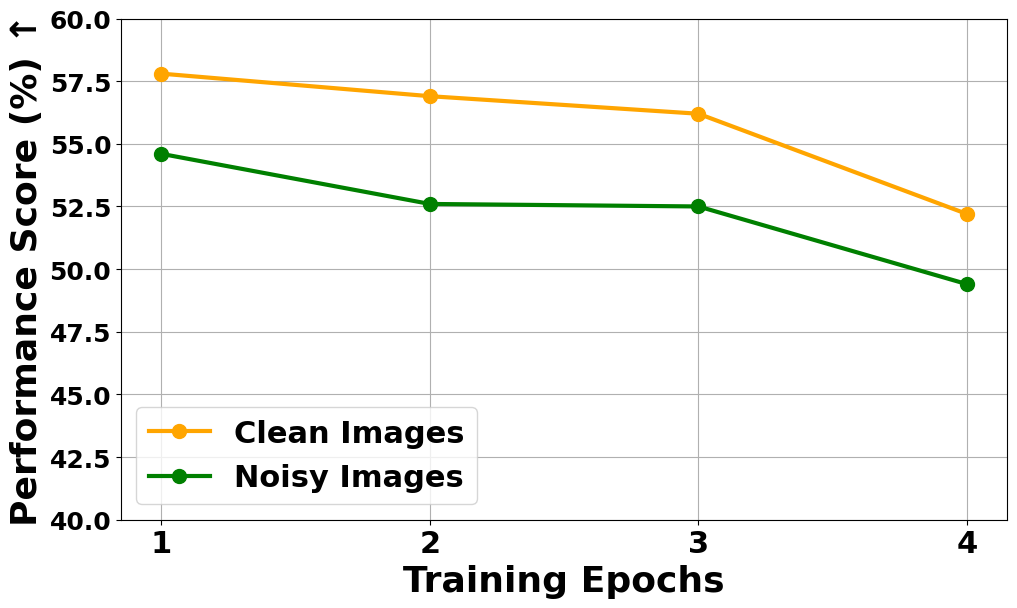

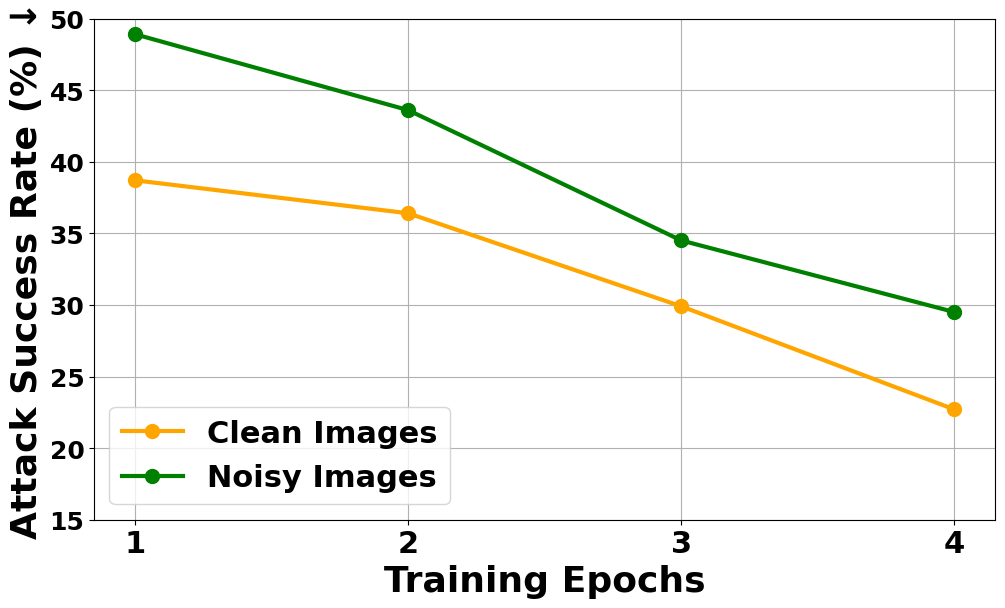

In [29]:
import matplotlib.pyplot as plt

# Data for each epoch setting
epochs = ["1", "2", "3", "4"]
mm_vet_clean = [57.8, 56.9, 56.2, 52.2]
mm_vet_noisy = [54.6, 52.6, 52.5, 49.4]
toxicity_clean = [38.7, 36.4, 29.9, 22.7]
toxicity_noisy = [48.9, 43.6, 34.5, 29.5]

# Plot MM-VET results (Higher is Better)
plt.figure(figsize=(10, 6))
plt.plot(epochs, mm_vet_clean, label="Clean Images", marker="o", linestyle="-", color="orange", linewidth=3, markersize=10)
plt.plot(epochs, mm_vet_noisy, label="Noisy Images", marker="o", linestyle="-", color="green", linewidth=3, markersize=10)
plt.xlabel("Training Epochs", fontsize=26)
plt.ylabel("Performance Score (%) ↑", fontsize=26)
plt.ylim(40, 60)  # Adjusted y-axis range for MM-VET
# plt.title("MM-Vet Performance by Training Epochs", fontsize=20)
plt.legend(loc="best", fontsize=22)
plt.grid(True)
plt.tight_layout()
plt.xticks(fontsize=22)
plt.yticks(fontsize=18)
plt.savefig('Ablation-Epochs-a.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Plot RealToxicityPrompts results (Lower is Better)
plt.figure(figsize=(10, 6))
plt.plot(epochs, toxicity_clean, label="Clean Images", marker="o", linestyle="-", color="orange", linewidth=3, markersize=10)
plt.plot(epochs, toxicity_noisy, label="Noisy Images", marker="o", linestyle="-", color="green", linewidth=3, markersize=10)
plt.xlabel("Training Epochs", fontsize=26)
plt.ylabel("Attack Success Rate (%) ↓", fontsize=26)
plt.ylim(15, 50)  # Adjusted y-axis range for RealToxicityPrompts
# plt.title("Attack Success Rate on RealToxicityPrompts by Training Epochs")
plt.legend(loc="lower left", fontsize=22)
plt.grid(True)
plt.tight_layout()
plt.xticks(fontsize=22)
plt.yticks(fontsize=18)
plt.savefig('Ablation-Epochs-b.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [3]:
import torch
import torch.nn as nn

# 定义一个 Conv2d 层，不带梯度
patch_embedding = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, bias=False)
patch_embedding.weight.requires_grad = False  # 禁用 Conv2d 层的梯度

# 创建输入张量并启用梯度
pixel_values = torch.randn(1, 3, 32, 32, requires_grad=True)  # batch_size=1, 3 channels, 32x32 image

# 前向传播
patch_embeds = patch_embedding(pixel_values)

# 检查梯度信息
print("patch_embeds.requires_grad:", patch_embeds.requires_grad)  # 应该为 True
print("patch_embeds.grad_fn:", patch_embeds.grad_fn)  # 应该不为 None

# 计算一个标量 loss 并反向传播
loss = patch_embeds.sum()
loss.backward()

# 检查 pixel_values 的梯度
print("pixel_values.grad:", pixel_values.grad)  # 应该不为 None

patch_embeds.requires_grad: True
patch_embeds.grad_fn: <ConvolutionBackward0 object at 0x77e4f2927a30>
pixel_values.grad: tensor([[[[-0.3190, -0.2239, -0.3824,  ..., -0.3824, -0.0634, -0.1585],
          [-1.7078, -1.0340, -0.1506,  ..., -0.1506,  1.5572,  0.8833],
          [-3.2546, -2.6141, -0.5760,  ..., -0.5760,  2.6786,  2.0381],
          ...,
          [-3.2546, -2.6141, -0.5760,  ..., -0.5760,  2.6786,  2.0381],
          [-2.9356, -2.3902, -0.1936,  ..., -0.1936,  2.7420,  2.1966],
          [-1.5468, -1.5801, -0.4254,  ..., -0.4254,  1.1214,  1.1547]],

         [[-0.6485, -0.7307, -1.4751,  ..., -1.4751, -0.8265, -0.7443],
          [-1.1858, -2.0050, -3.0900,  ..., -3.0900, -1.9043, -1.0851],
          [-1.8196, -2.6168, -3.9352,  ..., -3.9352, -2.1156, -1.3184],
          ...,
          [-1.8196, -2.6168, -3.9352,  ..., -3.9352, -2.1156, -1.3184],
          [-1.1711, -1.8860, -2.4601,  ..., -2.4601, -1.2891, -0.5741],
          [-0.6338, -0.6118, -0.8451,  ..., -0.8451, -

Plot saved successfully as: cosine_similarity_plot.pdf


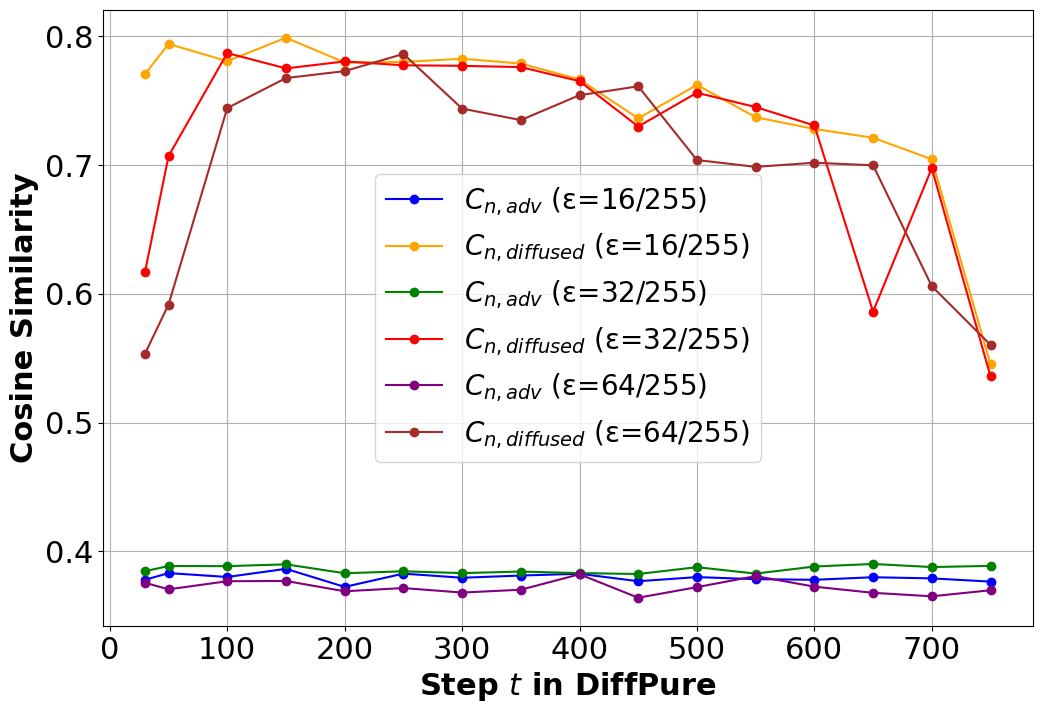

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
# 配置全局字体为加粗
# plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# 定义表格数据
data_all = {
    "t": [30, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750],
    "C_n, adv (ε=16/255)": [0.3780, 0.3832, 0.3802, 0.3865, 0.3725, 0.3828, 0.3796, 0.3813, 0.3827, 0.3769, 0.3801, 0.3785, 0.3780, 0.3800, 0.3791, 0.3766],
    "C_n, diffused (ε=16/255)": [0.7704, 0.7938, 0.7804, 0.7986, 0.7794, 0.7798, 0.7823, 0.7786, 0.7662, 0.7360, 0.7620, 0.7369, 0.7278, 0.7210, 0.7043, 0.5452],
    "C_n, adv (ε=32/255)": [0.3847, 0.3887, 0.3886, 0.3900, 0.3831, 0.3846, 0.3832, 0.3844, 0.3832, 0.3825, 0.3878, 0.3828, 0.3883, 0.3903, 0.3879, 0.3888],
    "C_n, diffused (ε=32/255)": [0.6171, 0.7067, 0.7867, 0.7748, 0.7802, 0.7772, 0.7768, 0.7758, 0.7649, 0.7297, 0.7559, 0.7448, 0.7305, 0.5861, 0.6974, 0.5358],
    "C_n, adv (ε=64/255)": [0.3757, 0.3706, 0.3769, 0.3771, 0.3691, 0.3716, 0.3681, 0.3703, 0.3823, 0.3641, 0.3723, 0.3809, 0.3727, 0.3679, 0.3652, 0.3699],
    "C_n, diffused (ε=64/255)": [0.5535, 0.5916, 0.7440, 0.7673, 0.7727, 0.7860, 0.7436, 0.7347, 0.7540, 0.7609, 0.7037, 0.6984, 0.7016, 0.6996, 0.6058, 0.5603],
}

# 将数据转换为 DataFrame
df_all = pd.DataFrame(data_all)

# 创建绘图窗口
plt.figure(figsize=(12, 8))

# 定义字体大小
font_size = 22

# 绘制 ε = 16/255 的数据
plt.plot(df_all["t"], df_all["C_n, adv (ε=16/255)"], marker='o', color='blue', label='$C_{n, adv}$ (ε=16/255)')
plt.plot(df_all["t"], df_all["C_n, diffused (ε=16/255)"], marker='o', color='orange', label='$C_{n, diffused}$ (ε=16/255)')

# 绘制 ε = 32/255 的数据
plt.plot(df_all["t"], df_all["C_n, adv (ε=32/255)"], marker='o', color='green', label='$C_{n, adv}$ (ε=32/255)')
plt.plot(df_all["t"], df_all["C_n, diffused (ε=32/255)"], marker='o', color='red', label='$C_{n, diffused}$ (ε=32/255)')

# 绘制 ε = 64/255 的数据
plt.plot(df_all["t"], df_all["C_n, adv (ε=64/255)"], marker='o', color='purple', label='$C_{n, adv}$ (ε=64/255)')
plt.plot(df_all["t"], df_all["C_n, diffused (ε=64/255)"], marker='o', color='brown', label='$C_{n, diffused}$ (ε=64/255)')

# 添加标签、图例和网格
plt.xlabel("Step $t$ in DiffPure", fontsize=font_size)
plt.ylabel("Cosine Similarity", fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=20)
plt.grid(visible=True)

# 显示上边框和右边框
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

# 保存为 PDF 文件
output_path = "cosine_similarity_plot.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')

print(f"Plot saved successfully as: {output_path}")

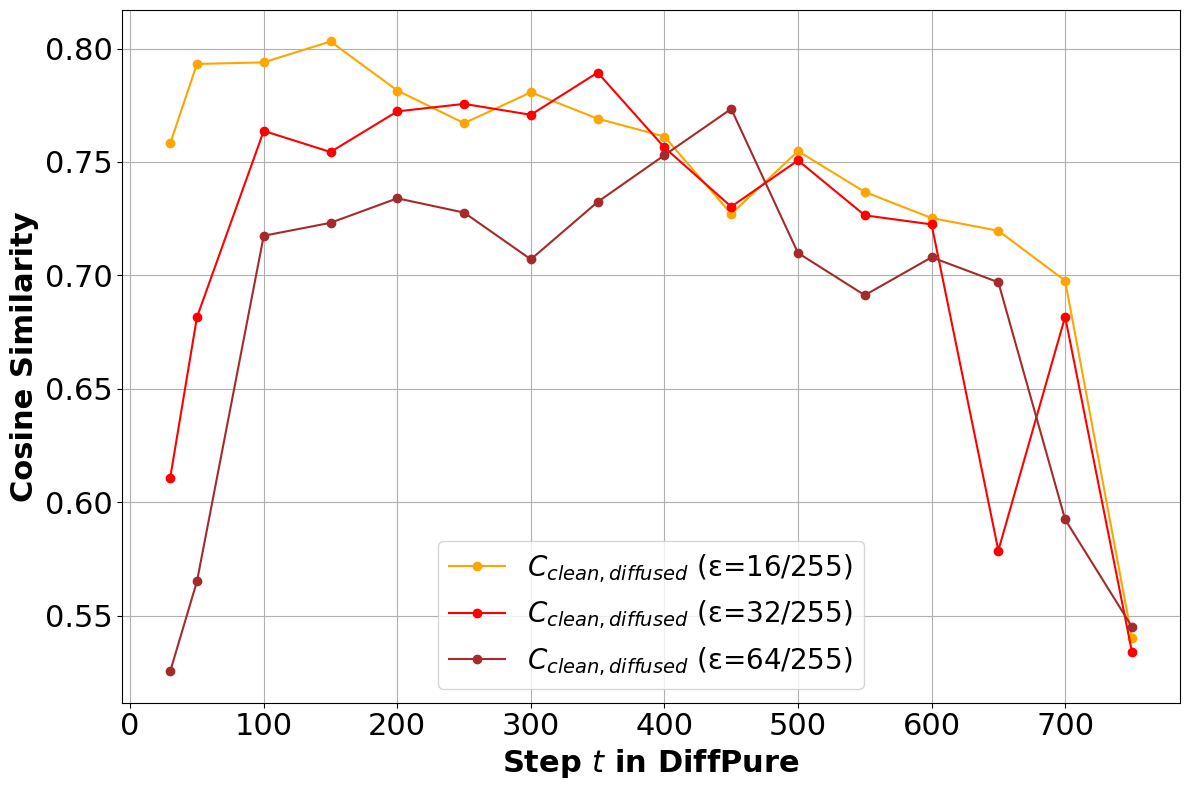

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
# 配置全局字体为加粗
# plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

import matplotlib.pyplot as plt

# 提取 t 和 c,diffused 数据
t_values = [30, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750]
c_diffused_16 = [0.7582, 0.7932, 0.7939, 0.8031, 0.7815, 0.7671, 0.7807, 0.7691, 0.7612, 0.7271, 0.7548, 0.7368, 0.7253, 0.7197, 0.6977, 0.5404]
c_diffused_32 = [0.6109, 0.6816, 0.7637, 0.7544, 0.7723, 0.7756, 0.7708, 0.7894, 0.7564, 0.7303, 0.7507, 0.7265, 0.7225, 0.5788, 0.6818, 0.5342]
c_diffused_64 = [0.5256, 0.5652, 0.7175, 0.7232, 0.7340, 0.7277, 0.7071, 0.7324, 0.7530, 0.7734, 0.7099, 0.6913, 0.7080, 0.6970, 0.5925, 0.5452]

# 创建图表
plt.figure(figsize=(12, 8))
plt.plot(t_values, c_diffused_16, marker='o', label='$C_{clean, diffused}$ (ε=16/255)', color='orange')
plt.plot(t_values, c_diffused_32, marker='o', label='$C_{clean, diffused}$ (ε=32/255)', color='red')
plt.plot(t_values, c_diffused_64, marker='o', label='$C_{clean, diffused}$ (ε=64/255)', color='brown')

# 图表标题和标签
# plt.title("Trend of C_clean, diffused across t", fontsize=16, fontweight='bold')
plt.xlabel("Step $t$ in DiffPure", fontsize=22)
plt.ylabel("Cosine Similarity", fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=20)
plt.grid(visible=True)

# 显示上边框和右边框
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

# 显示图表
plt.tight_layout()
# plt.show()
output_path = "cosine_similarity_plot_clean_diff.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')